In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NUM_TESTS = 100

In [124]:
df = pd.read_csv('training_log.csv', header = 0)
mean_score = df['mean_score']
median_score = df['median_score']
std = df['std_score']

window_size = 50

rolling_average_mean = [np.mean(mean_score[i:i+window_size]) for i in range(len(mean_score)-window_size)]
rolling_average_median = [np.mean(median_score[i:i+window_size]) for i in range(len(median_score)-window_size)]
rolling_average_std = [np.sqrt((np.sum((NUM_TESTS - 1) * std[i:i+window_size] * std[i:i+window_size]) + np.sum((NUM_TESTS - 1) * np.square(mean_score[i:i+window_size] - rolling_average_mean[i]))) / (window_size * (NUM_TESTS - 1))) for i in range(len(std)-window_size)]

print(len(df['mean_score']))

619


Text(0, 0.5, 'Validation Score')

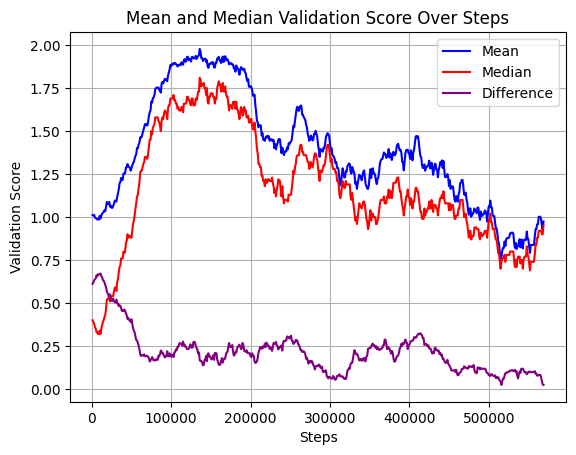

In [125]:
plt.plot(df['step'][:len(rolling_average_mean)], rolling_average_mean, color='blue', label="Mean")
plt.plot(df['step'][:len(rolling_average_median)], rolling_average_median, color='red', label="Median")
plt.plot(df['step'][:len(rolling_average_median)],np.array(rolling_average_mean)-np.array(rolling_average_median), color='purple', label="Difference")
plt.grid()
plt.legend()
plt.title("Mean and Median Validation Score Over Steps")
plt.xlabel("Steps")
plt.ylabel("Validation Score")

3.2071329743006043


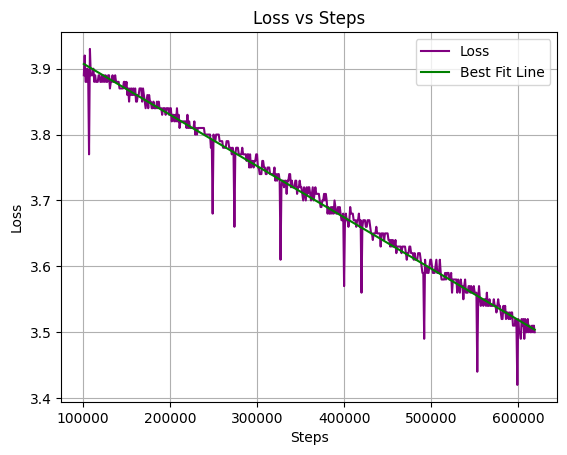

In [126]:
plt.plot(df['step'][NUM_TESTS:], df['loss'][NUM_TESTS:], color='Purple', label="Loss")
weight, bias = np.polyfit(df['step'][NUM_TESTS:],df['loss'][NUM_TESTS:],1)
best_fit_line = weight*df['step'][NUM_TESTS:]+bias
plt.plot(df['step'][NUM_TESTS:], best_fit_line, color='Green', label = "Best Fit Line")
plt.grid()
plt.legend()
plt.title("Loss vs Steps")
plt.xlabel("Steps")
plt.ylabel("Loss")
print(weight * 1000000 + bias)
